In [ ]:
Задание

    Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие 
    уникальные значения встречаются.
    
    Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
   
    Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
    
    Проанализируйте CTR с разбивкой по рекламной кампании.
    
    Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры 
    центральной тенденции и меры изменчивости. 
    
    Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
    
    Посчитайте конверсию из клика в покупку.

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
    Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие 
    уникальные значения встречаются.

In [2]:
conversion = pd.read_csv('conversion.csv')
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [3]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [5]:
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [11]:
conversion.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [ ]:
    Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

In [40]:
conversion_Impressions = conversion \
    .groupby('fb_campaign_id') \
    .agg({'Impressions': 'sum'}) 
conversion_Impressions

,Impressions
fb_campaign_id,
103916,7350
103917,17861
103920,693
103928,8392
103929,1915
...,...
179977,1129773
179978,637549
179979,151531


In [41]:
conversion_Impressions_log = np.log(conversion_Impressions)
conversion_Impressions_log

,Impressions
fb_campaign_id,
103916,8.902456
103917,9.790375
103920,6.541030
103928,9.035034
103929,7.557473
...,...
179977,13.937527
179978,13.365386
179979,11.928546


<AxesSubplot:xlabel='Impressions'>

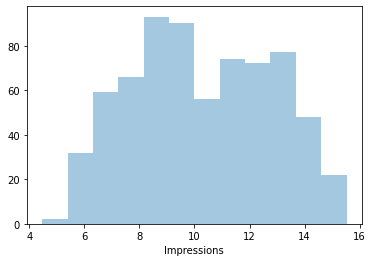

In [152]:
sns.distplot(conversion_Impressions_log.Impressions, kde = False)

In [ ]:
    Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

In [44]:
conversion['CTR'] = conversion.Clicks / conversion.Impressions

In [46]:
conversion.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [47]:
conversion.CTR.idxmax()

150

In [53]:
conversion.iloc[150]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR                    0.001059
Name: 150, dtype: object

In [49]:
conversion.sort_values('CTR')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
434,950109,936,123445,30-34,M,20,343,0,0.00,1,1,0.000000
467,951021,936,123597,30-34,F,7,457,0,0.00,1,1,0.000000
516,952080,936,123774,40-44,F,27,415,0,0.00,1,0,0.000000
181,747879,936,110947,30-34,F,30,493,0,0.00,1,0,0.000000
182,747903,936,110951,30-34,F,63,1491,0,0.00,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845


In [ ]:
    Проанализируйте CTR с разбивкой по рекламной кампании 916.

<AxesSubplot:xlabel='CTR', ylabel='Density'>

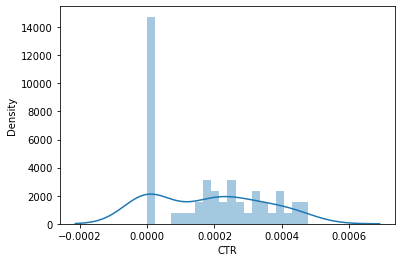

In [153]:
sns.distplot(conversion.query('xyz_campaign_id == 916').CTR, bins=20)

In [ ]:
    Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры 
    центральной тенденции и меры изменчивости. 

In [119]:
conversion['CPC'] = conversion.Spent / conversion.Clicks
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926


In [77]:
conversion.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [106]:
round(ss.iqr(conversion.CPC, nan_policy='omit'), 2)

0.25

<AxesSubplot:xlabel='CPC', ylabel='Density'>

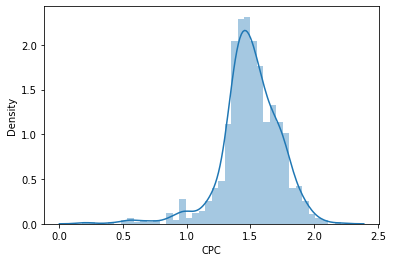

In [154]:
sns.distplot(conversion.CPC.dropna())

In [ ]:
    Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

<AxesSubplot:xlabel='CPC', ylabel='Density'>

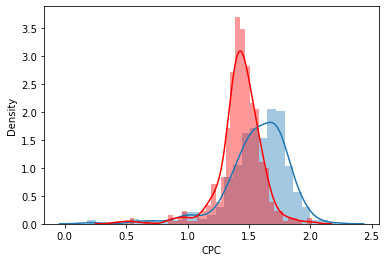

In [155]:
sns.distplot(conversion.query("gender == 'M'").CPC.dropna())
sns.distplot(conversion.query("gender == 'F'").CPC.dropna(), color='red')

In [ ]:
    Посчитайте конверсию из клика в покупку.

In [156]:
conversion['CR'] = conversion.Approved_Conversion / conversion.Clicks * 100

In [167]:
conversion[['ad_id', 'CR']]

,ad_id,CR
0,708746,100.000000
1,708749,0.000000
2,708771,NaN
3,708815,0.000000
4,708818,100.000000
...,...,...
1138,1314410,0.793651
1139,1314411,0.000000
1140,1314412,0.000000
1141,1314414,1.481481


In [168]:
round(conversion.query('ad_id == 1121814 ').CR, 2)

860    3.09
Name: CR, dtype: float64